In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle
import CommonFunction as cf
from PCAFunction import PCAFunction
from sklearn.decomposition import PCA
from skimage.io import imread

In [2]:
Nsample = 200
sampleNoise = 0.1

X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)

t = t.reshape(-1,1)

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
    lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
    lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
    lambda x: np.power(x[:, 0], 4),
    lambda x: np.power(x[:, 1], 4),
]
Xfeatures = cf.CommonFunction(X, funcs).generate()
print("origin:",Xfeatures.shape)

origin: (200, 14)


(256, 256)


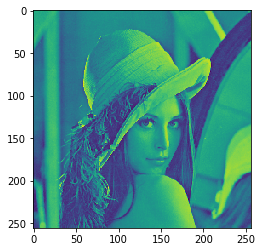

In [3]:
img = imread("8-bit-256-x-256-Grayscale-Lena-Image.png")
print(img.shape)
plt.imshow(img)

(256, 150)


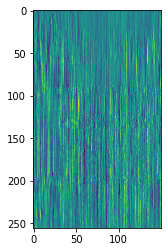

In [4]:
n_components = 150
pca = PCAFunction(n_components)
Xu = pca.fit_transform(img)
print(Xu.shape)
plt.imshow(Xu)

(256, 256)


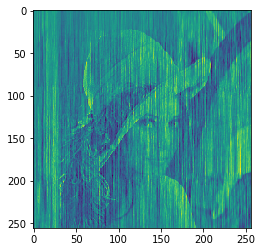

In [5]:
X = pca.inverse_transform(Xu)
print(X.shape)
plt.imshow(X)

(256, 150)


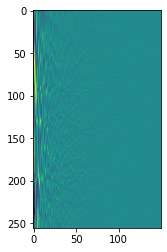

In [6]:
pca_scikit = PCA(n_components=150)
Xu_scikit = pca_scikit.fit_transform(img)
print(Xu_scikit.shape)
plt.imshow(Xu_scikit)

(256, 256)


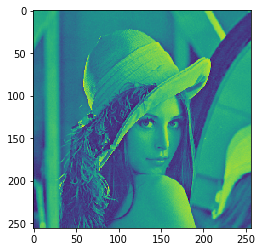

In [7]:
X_origin = pca_scikit.inverse_transform(Xu_scikit)
print(X_origin.shape)
plt.imshow(X_origin)